# HACKATHON - INNOMATICS RESEARCH LAB 

## Building Movie Recommeder system

## LOADING DATASETS

In [47]:
import pandas as pd
import numpy as np

In [46]:
ratings_df = pd.read_csv("C:/Users/Athul/Downloads/movie_data/ratings.csv")
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [48]:
movies_df = pd.read_csv("C:/Users/Athul/Downloads/movie_data/movies.csv")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [49]:
links_df =pd.read_csv("C:/Users/Athul/Downloads/movie_data/links.csv")
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [50]:
tags_df =pd.read_csv("C:/Users/Athul/Downloads/movie_data/tags.csv")
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [51]:
ratings_df.shape

(100836, 4)

In [52]:
movies_df.shape

(9742, 3)

In [53]:
unique_id = ratings_df['userId'].nunique()
print(unique_id)

610


## Which movie has recieved maximum number of user ratings

In [54]:
# Count the number of ratings for each movie
rating_counts = ratings_df['movieId'].value_counts()

# Convert the Series to a DataFrame for easier merging
rating_counts = rating_counts.reset_index()
rating_counts.columns = ['movieId', 'rating_count']


In [55]:
# Merge the rating counts with the movies DataFrame to get movie titles
merged_df1 = pd.merge(rating_counts, movies_df, on='movieId')

# Find the movie with the maximum number of ratings
most_rated_movie = merged_df1.loc[merged_df1['rating_count'].idxmax()]

print(f"Movie with the maximum number of user ratings:")
print(f"Title: {most_rated_movie['title']}")
print(f"Number of Ratings: {most_rated_movie['rating_count']}")


Movie with the maximum number of user ratings:
Title: Forrest Gump (1994)
Number of Ratings: 329


## Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [56]:
matrix_movie = movies_df[movies_df['title'] == 'Matrix, The (1999)']

if not matrix_movie.empty:
    matrix_movie_id = matrix_movie['movieId'].values[0]
else:
    raise ValueError("Movie 'Matrix, The (1999)' not found in the dataset")

print(f"Movie ID for 'Matrix, The (1999)': {matrix_movie_id}")


Movie ID for 'Matrix, The (1999)': 2571


In [57]:
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

# List all tags
tags_list = tags_df['tag'].unique()

print("Tags submitted by users for 'Matrix, The (1999)':")
print(tags_list)


Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [58]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']

if not terminator_movie.empty:
    terminator_movie_id = terminator_movie['movieId'].values[0]
else:
    raise ValueError("Movie 'Terminator 2: Judgment Day (1991)' not found in the dataset")

print(f"Movie ID for 'Terminator 2: Judgment Day (1991)': {terminator_movie_id}")


Movie ID for 'Terminator 2: Judgment Day (1991)': 589


In [59]:
# Filter ratings for the movieId
terminator_ratings = df_ratings[df_ratings['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

In [60]:
fight_club_movie = movies_df[movies_df['title'] == 'Fight Club (1999)']

if not fight_club_movie.empty:
    fight_club_movie_id = fight_club_movie['movieId'].values[0]
else:
    raise ValueError("Movie 'Fight Club (1999)' not found in the dataset")

print(f"Movie ID for 'Fight Club (1999)': {fight_club_movie_id}")


Movie ID for 'Fight Club (1999)': 2959


In [61]:
# Filter ratings for the movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]


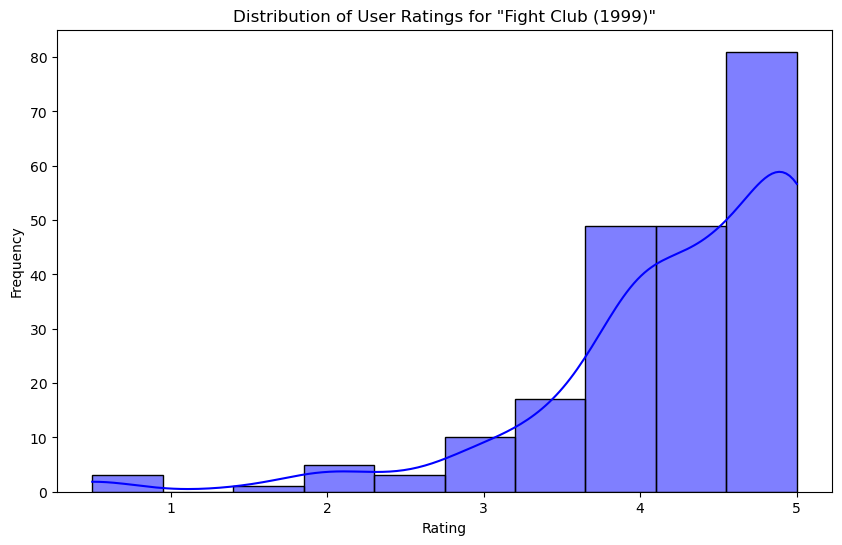

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Group user ratings and Apply aggregations

In [63]:

# Group user ratings by movieId and calculate count and mean of ratings
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

print(grouped_ratings.head())

   movieId  rating_count  average_rating
0        1           215        3.920930
1        2           110        3.431818
2        3            52        3.259615
3        4             7        2.357143
4        5            49        3.071429


## Apply Inner Join with Movies DataFrame

In [64]:
# Merge the grouped ratings DataFrame with the movies DataFrame on movieId
merged_df = pd.merge(grouped_ratings,movies_df, on='movieId')

print(merged_df.head())


   movieId  rating_count  average_rating                               title  \
0        1           215        3.920930                    Toy Story (1995)   
1        2           110        3.431818                      Jumanji (1995)   
2        3            52        3.259615             Grumpier Old Men (1995)   
3        4             7        2.357143            Waiting to Exhale (1995)   
4        5            49        3.071429  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


## Filter Movies with More Than 50 User Ratings

In [65]:
# Filter movies with more than 50 user ratings
movies_filtered = merged_df[merged_df['rating_count'] > 50]

print(f"Number of movies with more than 50 user ratings: {movies_filtered.shape[0]}")
print(movies_filtered.head())


Number of movies with more than 50 user ratings: 436
   movieId  rating_count  average_rating                    title  \
0        1           215        3.920930         Toy Story (1995)   
1        2           110        3.431818           Jumanji (1995)   
2        3            52        3.259615  Grumpier Old Men (1995)   
5        6           102        3.946078              Heat (1995)   
6        7            54        3.185185           Sabrina (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  


# Find the movie with the highest average rating

In [66]:
most_popular_movie = movies_filtered.loc[filtered_movies['average_rating'].idxmax()]

# Display the most popular movie based on average user ratings
print(f"Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['average_rating']:.2f}")
print(f"Number of Ratings: {most_popular_movie['rating_count']}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Number of Ratings: 317


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [67]:
#Sort movies by the number of ratings in descending order and get the top 5
top_5_movies = movies_filtered.sort_values(by='rating_count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


## Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [68]:
sci_fi_movies = movies_filtered[movies_filtered['genres'].str.contains('Sci-Fi', case=False, na=False)]

sci_fi_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi = sci_fi_sorted.iloc[2]  

print(f"Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['rating_count']}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of Ratings: 238


##  scrape the IMDB reviews of each movie with more than 50 user ratings. 


In [69]:
# Merge with links DataFrame to get IMDb IDs
movies_with_links = pd.merge(movies_filtered, df_links, on='movieId')

print(movies_with_links[['movieId', 'title', 'imdbId']])

     movieId                             title   imdbId
0          1                  Toy Story (1995)   114709
1          2                    Jumanji (1995)   113497
2          3           Grumpier Old Men (1995)   113228
3          6                       Heat (1995)   113277
4          7                    Sabrina (1995)   114319
..       ...                               ...      ...
431   106782   Wolf of Wall Street, The (2013)   993846
432   109374  Grand Budapest Hotel, The (2014)  2278388
433   109487               Interstellar (2014)   816692
434   112852    Guardians of the Galaxy (2014)  2015381
435   122904                   Deadpool (2016)  1431045

[436 rows x 3 columns]


## Find the Movie with the Highest IMDb Rating

In [77]:
pip install IMDbPY


  Obtaining dependency information for IMDbPY from https://files.pythonhosted.org/packages/6f/3c/38555ae0ae26487eff082065a1f7b7a490f7f6e13ea249b8e82cfcc6eb31/IMDbPY-2022.7.9-py3-none-any.whl.metadata
  Obtaining dependency information for cinemagoer from https://files.pythonhosted.org/packages/a7/cc/959c7d74b7d6124852fc4741c154c8f50848f47360955f780636102ec711/cinemagoer-2023.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/297.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/297.2 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 297.2/297.2 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
from imdb import IMDb

# Create an IMDb instance
ia = IMDb()

# Function to fetch IMDb rating using IMDbPY
def fetch_imdb_rating(movie_id):
    try:
        # Get the movie object using the IMDb ID
        movie = ia.get_movie(movie_id)
        # Fetch the IMDb rating
        rating = movie.get('rating')
        return rating
    except:
        return None

 
 rating = fetch_imdb_rating(movie_id)

# Print the result
print(f"Movie ID: {movie_id}, IMDb Rating: {rating}")


Movie ID: 0111161, IMDb Rating: 9.3


In [80]:
from imdb import IMDb

# Create an IMDb instance
ia = IMDb()

# Function to fetch IMDb rating using IMDbPY
def fetch_imdb_rating(movie_id):
    try:
        # Get the movie object using the IMDb ID
        movie = ia.get_movie(movie_id)
        # Fetch the IMDb rating
        rating = movie.get('rating')
        return rating
    except:
        return None

  
 rating = fetch_imdb_rating(movie_id)

# Print the result
print(f"Movie ID: {movie_id}, IMDb Rating: {rating}")


Movie ID: 0062622, IMDb Rating: 8.3
